<a href="https://colab.research.google.com/github/snoop2head/Fun_Cool_Sexy_Damedane/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/AliaksandrSiarohin/first-order-model
!git clone https://github.com/snoop2head/Fun_Cool_Sexy_Damedane

Cloning into 'first-order-model'...
remote: Enumerating objects: 246, done.
remote: Total 246 (delta 0), reused 0 (delta 0), pack-reused 246
Receiving objects: 100% (246/246), 71.46 MiB | 21.20 MiB/s, done.
Resolving deltas: 100% (121/121), done.
Cloning into 'Fun_Cool_Sexy_Damedane'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 18 (delta 6), reused 13 (delta 3), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [ ]:
!pip install PyDrive

## Get .tar files, mount to Google Colab

In [ ]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# choose a local (colab) directory to store the data.
local_download_path = os.path.expanduser('./data')
try:
  os.makedirs(local_download_path)
except: pass

# 2. Auto-iterate using the query syntax
#    https://developers.google.com/drive/v2/web/search-parameters
file_list = drive.ListFile(
    {'q': "'1LOhNjbDUFMDxqWvzlaJeN2JVytuHEPzd' in parents"}).GetList()

for f in file_list:
  # 3. Create & download by id.
  print('title: %s, id: %s' % (f['title'], f['id']))
  fname = os.path.join(local_download_path, f['title'])
  print('downloading to {}'.format(fname))
  f_ = drive.CreateFile({'id': f['id']})
  f_.GetContentFile(fname)

title: vox-adv-cpk.pth.tar, id: 1kq5BzpzmZCVQdgmQ7X1kQeCmRjXbR5kY
downloading to ./data/vox-adv-cpk.pth.tar
title: vox-cpk.pth.tar, id: 1NtrG1-y_8e7oCX9UwldYf3MlSIYvkNPl
downloading to ./data/vox-cpk.pth.tar


## Make meme video

In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

source_image = imageio.imread("./Fun_Cool_Sexy_Damedane/fun_cool_sexy.png")
driving_video = imageio.mimread("./Fun_Cool_Sexy_Damedane/dame_da_ne_source.mp4")

#Resize image and video to 256x256
source_image = resize(source_image, (256, 256))[..., :3]
driving_video = [resize(frame, (256, 256))[..., :3] for frame in driving_video]

def display(source, driving, generated=None):
    fig = plt.figure(figsize=(8 + 4 * (generated is not None), 6))

    ims = []
    for i in range(len(driving)):
        cols = [source]
        cols.append(driving[i])
        if generated is not None:
            cols.append(generated[i])
        im = plt.imshow(np.concatenate(cols, axis=1), animated=True)
        plt.axis('off')
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=1000)
    plt.close()
    return ani
    

HTML(display(source_image, driving_video).to_html5_video())

In [ ]:
%cd first-order-model

/content/first-order-model


In [ ]:
from demo import load_checkpoints
generator, kp_detector = load_checkpoints(config_path='config/vox-256.yaml', 
                            checkpoint_path='../data/vox-cpk.pth.tar')

In [ ]:
from demo import make_animation
from skimage import img_as_ubyte

predictions = make_animation(source_image, driving_video, generator, kp_detector, relative=True)

#save resulting video
imageio.mimsave('../generated.mp4', [img_as_ubyte(frame) for frame in predictions])
#video can be downloaded from /content folder

HTML(display(source_image, driving_video, predictions).to_html5_video())

100%|██████████| 836/836 [00:16<00:00, 51.67it/s]


## Add music to mp4 file

In [ ]:
! pip install imageio-ffmpeg moviepy

     |████████████████████████████████| 26.9MB 112kB/s 


In [ ]:
import warnings
warnings.filterwarnings("ignore")
from moviepy.editor import VideoFileClip, vfx, AudioFileClip, CompositeAudioClip


print('Speeding video up by 1.5x')
import_path = '../generated.mp4'
clip = VideoFileClip(import_path)
finalclip = clip.fx(vfx.speedx, 3)

print('Adding Background Music')
audio = AudioFileClip('../Fun_Cool_Sexy_Damedane/audio.mp3')
print('Exporting final clip')
finalclip = finalclip.set_audio(audio)

export_path = '../generated_with_sound.mp4'
finalclip.write_videofile(export_path)
print(f'video exported as {export_path}')

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3465216/45929032 bytes (7.5%)7716864/45929032 bytes (16.8%)11911168/45929032 bytes (25.9%)16072704/45929032 bytes (35.0%)20242432/45929032 bytes (44.1%)24289280/45929032 bytes (52.9%)28377088/45929032 bytes (61.8%)32538624/45929032 bytes (70.8%)36683776/45929032 bytes (79.9%)40886272/45929032 bytes (89.0%)45023232/45929032 bytes (98.0%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root

100%|██████████| 667/667 [00:01<00:00, 612.39it/s]

[MoviePy] Done.
[MoviePy] Writing video ../generated_with_sound.mp4



100%|██████████| 279/279 [00:01<00:00, 265.78it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ../generated_with_sound.mp4 

video exported as ../generated_with_sound.mp4


### Download the meme from the left panel!

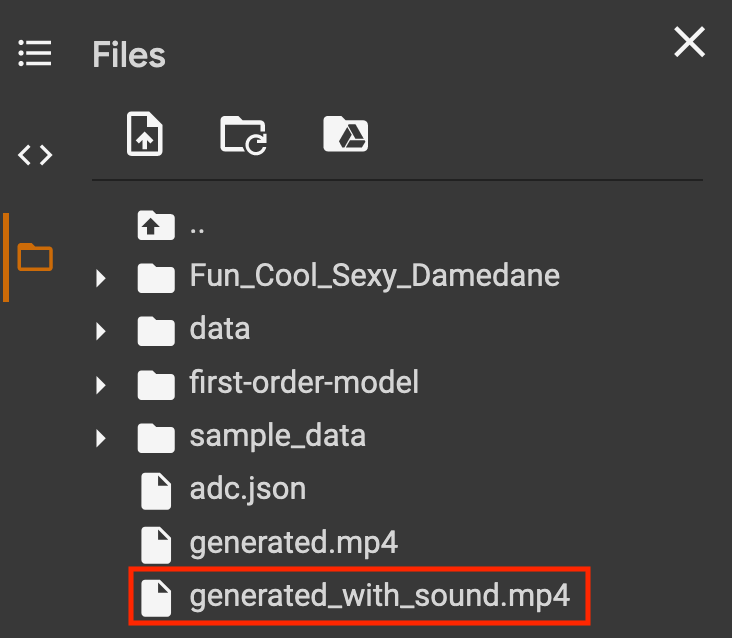